# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

#standrdizing header names with the lower function + replacing the space with an underscore
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [62]:
import numpy as np

#creating a new dataframe (numerical) only including columns with numerical data

numerical = data.select_dtypes(include=np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [63]:
#creating a new dataframe (categoricals) only including columns with categorial data

categoricals = data.select_dtypes(include=np.object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


In [64]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

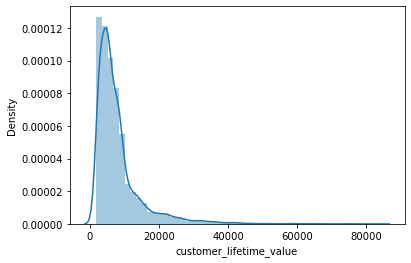

In [65]:
#using seaborn library to construct distribution plots
sns.distplot(numerical["customer_lifetime_value"])

<AxesSubplot:xlabel='income', ylabel='Density'>

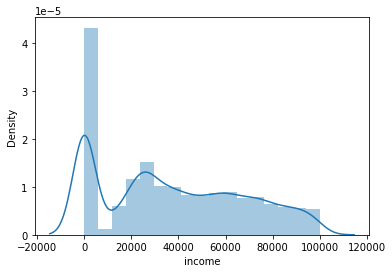

In [66]:
sns.distplot(numerical["income"])

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

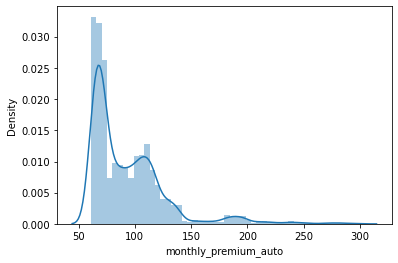

In [67]:
sns.distplot(numerical["monthly_premium_auto"])

<AxesSubplot:xlabel='months_since_last_claim', ylabel='Density'>

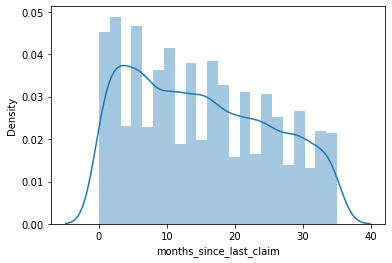

In [68]:
sns.distplot(numerical["months_since_last_claim"])

<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Density'>

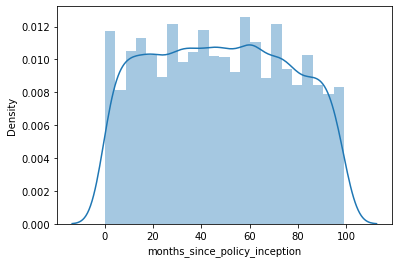

In [69]:
sns.distplot(numerical["months_since_policy_inception"])

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

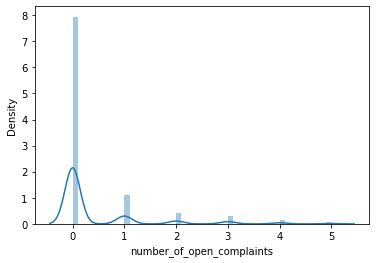

In [70]:
sns.distplot(numerical["number_of_open_complaints"])

<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

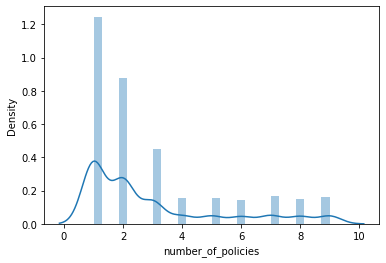

In [71]:
sns.distplot(numerical["number_of_policies"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

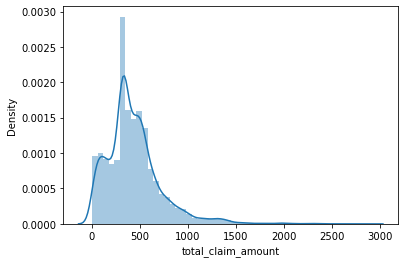

In [72]:
sns.distplot(numerical["total_claim_amount"])

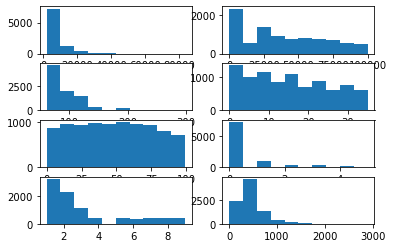

In [73]:
import matplotlib.pyplot as plt

#using matplotlib to construct histograms

fig, axs = plt.subplots(4,2) 

axs[0, 0].hist(data['customer_lifetime_value'])
axs[0, 1].hist(data['income'])
axs[1, 0].hist(data['monthly_premium_auto'])
axs[1, 1].hist(data['months_since_last_claim'])
axs[2, 0].hist(data['months_since_policy_inception'])
axs[2, 1].hist(data['number_of_open_complaints'])
axs[3, 0].hist(data['number_of_policies'])
axs[3, 1].hist(data['total_claim_amount'])
plt.show()

In [74]:
#Do the distributions for different numerical variables look like a normal distribution? 
#No, from the curve months_since_policy_inception get the most near to a normal distribution.


### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [75]:
#checking the multicollinearity between the features 
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:14:16   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [78]:
correlations_matrix = X.corr()
correlations_matrix

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,NaN,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,NaN,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly_premium_auto,NaN,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,NaN,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,NaN,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,NaN,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,NaN,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


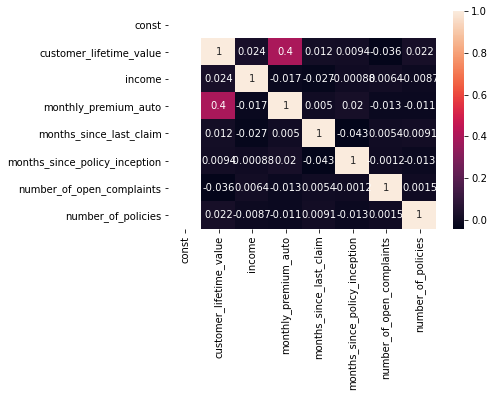

In [79]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
plt.show()

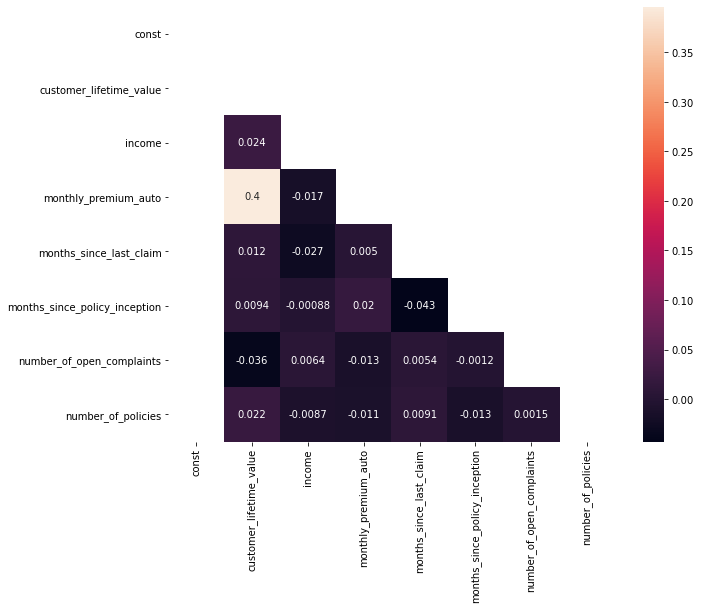

In [81]:
#hiding the double values, to drop all values that are higher than 0,9. Hope this is what you asked for in the task. 
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()